In [ ]:
#Import libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [42]:
#Import data set and save as heart_data

In [44]:
data = pd.read_csv('C:/Users/u148533/Heart Disease Risk Factors.csv')

In [45]:
#Use .info() to see a summary of the data

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [47]:
#run .head() to take a look at what the first few rows look like

In [48]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [49]:
#run .tail() to take a look at what the last few rows look like

In [50]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [51]:
#run .shape to determine the number of rows and columns in the dataframe

In [53]:
data.shape

(1025, 14)

In [54]:
#create "missing" dataset to see if there are any missing values in the dataset.  We confirmed there are 1024 obvservations in the previous steps, and we see here there are no missing values

In [55]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['column', '%']
missing = missing.sort_values(by='%', ascending = False)
print(missing)

          column    %
age            0  0.0
sex            0  0.0
cp             0  0.0
trestbps       0  0.0
chol           0  0.0
fbs            0  0.0
restecg        0  0.0
thalach        0  0.0
exang          0  0.0
oldpeak        0  0.0
slope          0  0.0
ca             0  0.0
thal           0  0.0
target         0  0.0


In [56]:
#run .describe() on the data to see the basic statistical summaries of each numeric variable (all variables in the dataset are numeric)

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [58]:
#create histograms of each numeric value to see how they are distributed

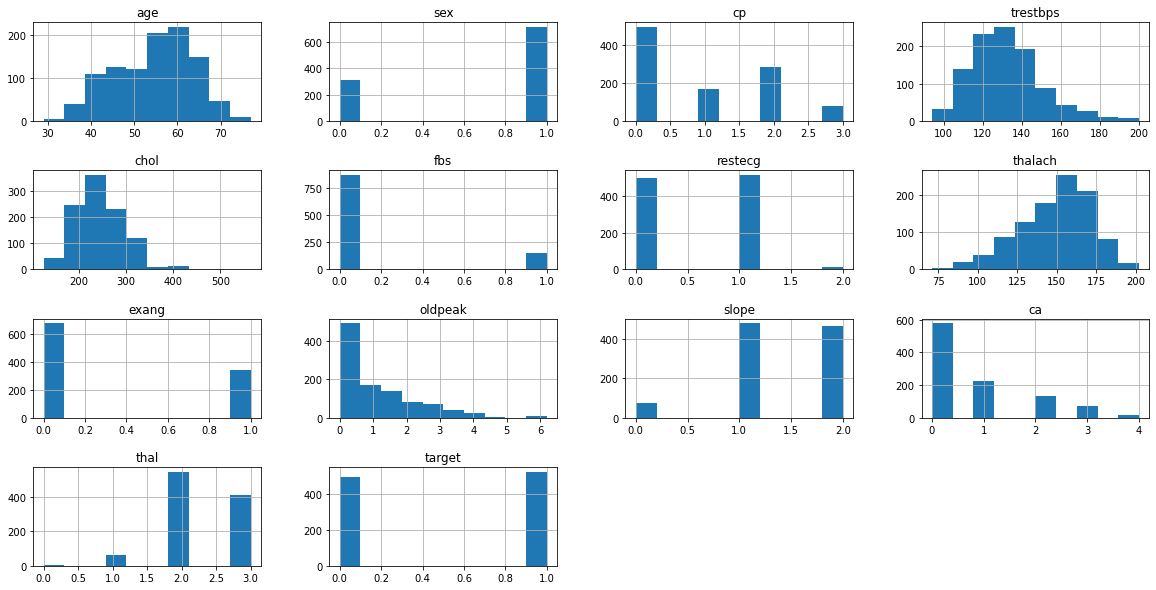

In [59]:
data.hist(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

In [60]:
#Check for duplicate rows

In [61]:
distinct_count = len(data.drop_duplicates())
duplicate_count = len(data) - distinct_count
f'{distinct_count} distinct rows and {duplicate_count} duplicated rows'

'302 distinct rows and 723 duplicated rows'

In [62]:
#Create new dataset that drops duplicate rows

In [112]:
heart = data.drop_duplicates()

In [98]:
#Rerun .info() .shape and .hist for new dataset

In [99]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [100]:
heart.shape

(302, 14)

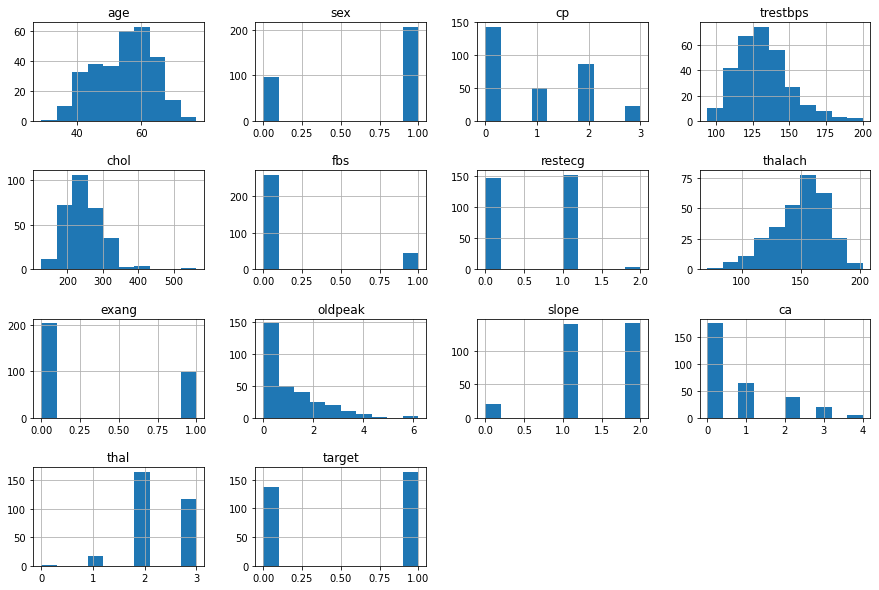

In [101]:
heart.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [110]:
heart.thal.value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [102]:
#We see the ca variable has observations that = 4, but it is only supposed to go from 0-3. value_counts() confirms 18 observations =4

In [103]:
heart.ca.value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [104]:
#sort data by ca so we can change the value to 3 (most likely a mistype)

In [105]:
heart=heart.sort_values(by=['ca'])

In [106]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
323,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
521,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [ ]:
#use iloc to change the incorrect value from 4 to 3

In [107]:
heart.iloc[[298,299,300,301],[11]]=3

In [ ]:
#rerun .tail() to confirm values were updated

In [108]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
323,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
52,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1
521,58,1,1,125,220,0,1,144,0,0.4,1,3,3,1
128,52,1,2,138,223,0,1,169,0,0.0,2,3,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,3,3,0


In [ ]:
#write clean data to new csv and output

In [78]:
heart.to_csv('heart_data_clean.csv')